
Course Name: Pattern Recognition Lab

Course No: CSE 4214

Experiment Name: Implementing the Perceptron algorithm for finding the weights of a Linear Discriminant function

Name: Umme Habiba, Section: A1, ID: 170104004

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

1. Take input from “train.txt” file. Plot all sample points from both classes, but samples
from the same class should have the same color and marker. Observe if these two
classes can be separated with a linear boundary.

In [149]:
train_df = pd.read_csv('/content/drive/MyDrive/CSE4214/Assignment2/train-perceptron.txt',sep= ' ',names=["x1","x2","Y"])
train_df

,x1,x2,Y
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [150]:
#variables
omega_one=[]
omega_two=[]
omega_one_phi=[]
omega_two_phi=[]
lr = np.arange(0.1,1.1,0.1)

In [151]:
#training data separation
def class_separation(df):
  for i in range(0,len(df)):  ##if the class value is 1 then store it in class 1 else class 2
    li=[]
    if df['Y'][i]==1:
      li=df['x1'][i],df['x2'][i]
      omega_one.append(li)
    elif df['Y'][i]==2:
      li=df['x1'][i],df['x2'][i]
      omega_two.append(li)

In [152]:
class_separation(train_df)

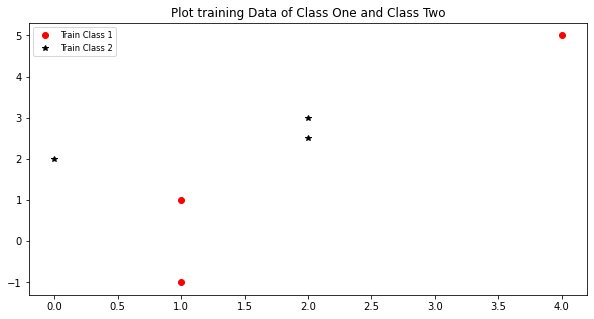

In [153]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.set_title('Plot training Data of Class One and Class Two')
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"k*",label="Train Class 2")
plt.legend(loc="upper left",shadow=False, fontsize='small',labelspacing=0.5)
plt.show()



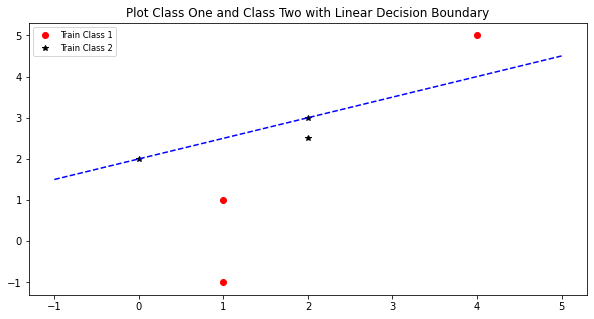

In [154]:
minimum=min(min(train_df["x1"]),min(train_df["x2"]))
maximum=max(max(train_df["x1"]),max(train_df["x2"]))
x=[]
y=[]
m=0.5
c=2
for i in range(int(minimum),int(maximum+1)):
  x.append(i)
  y.append(m*i+c)
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.set_title('Plot Class One and Class Two with Linear Decision Boundary')
plt.plot(*zip(*omega_one),'ro',label="Train Class 1")
plt.plot(*zip(*omega_two),"k*",label="Train Class 2")
plt.legend(loc="upper left",shadow=False, fontsize='small',labelspacing=0.5)
ax.plot(x,y,"--",label=' Decision Boundary',color="b")
plt.show()

2. Consider the case of a second order polynomial discriminant function. Generate the
high dimensional sample points y, as discussed in the class.

In [155]:
#Phi function
def phi(omega_value):
  return [pow(omega_value[0],2),pow(omega_value[1],2),omega_value[0]*omega_value[1],omega_value[0],omega_value[1],1]

In [156]:
#Generate the high dimensional sample points
for omega in omega_one:
  omega_one_phi.append(phi(omega))
for omega in omega_two:
  omega_two_phi.append(phi(omega))
normalize_omega_two=np.array(omega_two_phi).dot(-1)
phi = np.concatenate((np.array(omega_one_phi),normalize_omega_two))
phi

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [ 0.  , -4.  ,  0.  ,  0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

3.  Use Perceptron Algorithm (both one at a time and many at a time) for finding the weightcoefficients of the discriminant function (i.e., values of w) boundary for your linear classifier in task 2.

Many at a Time

In [157]:
def batch_update(learning_rate,weights):
  correctly_classified=False
  miss_classified=0
  iteration=0
  while correctly_classified==False and iteration<=200:
    miss_classified = 0
    sum_weights=np.zeros(6)
    for i in range(len(phi)):
      if (np.dot(weights,phi[i])) <= 0:
        sum_weights = np.add(sum_weights , phi[i])
        miss_classified +=1
    if miss_classified == 0:
      correctly_classified = True
    else:
      correctly_classified=False
      weights = weights + np.dot(learning_rate ,sum_weights)
    iteration += 1
  return iteration

One at a time

In [158]:
def single_update(learning_rate,weights):
  correctly_classified=False
  iteration=0
  while correctly_classified==False and iteration<=200:
    miss_classified=0
    for i in range(len(phi)):
      if (np.dot(weights,phi[i])) <= 0:
        weights = weights + np.dot(learning_rate,phi[i])
        miss_classified +=1
    if miss_classified == 0:
      correctly_classified = True
    iteration += 1
  return iteration

4. Three initial weights have to be used (all one, all zero, randomly initialized with seed fixed). For all of these three cases vary the learning rate between 0.1 and 1 with step size 0.1. Create a table which should contain your learning rate, number of iterations for one at a time and batch Perceptron for all of the three initial weights. You also have to create a bar chart visualizing your table data.

In [159]:
# table show
def table_show(learning_rate,many_at_a_time,one_at_a_time):
  dict = {'Learning rate': learning_rate,'Many at a time':many_at_a_time,'One at a time':one_at_a_time}
  dataframe = pd.DataFrame(dict)

  print(dataframe.to_string(index=False))

In [173]:
#perception comparision
def perception_comparison(learning_rate, many_at_a_time,one_at_a_time):
  labels=[]
  for i in learning_rate:
    labels.append(str(round(i,2)))
  x = np.arange(len(lr))
  width = 0.35
  fig, ax = plt.subplots()
  fig.set_size_inches(8,6)
  ax.bar(x - width/2, one_at_a_time, width, label='One at a time')
  ax.bar(x + width/2, many_at_a_time, width, label='Many at a time')
  ax.set_xlabel('Learning rate')
  ax.set_ylabel('No of iterations')
  ax.set_title('Perception comparison')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  plt.show()

All Weights Zero

In [174]:
single_iter=[]
weights=np.zeros(6)
for i in lr:
  iter= single_update(i,weights)
  single_iter.append(iter)
batch_iter=[]
for i in lr:
  iter= batch_update(i,weights)
  batch_iter.append(iter)
table_show(lr,batch_iter,single_iter)


 Learning rate  Many at a time  One at a time
           0.1             105             94
           0.2             105             94
           0.3              92             94
           0.4             105             94
           0.5              92             94
           0.6             105             94
           0.7             105             94
           0.8             105             94
           0.9             105             94
           1.0              92             94


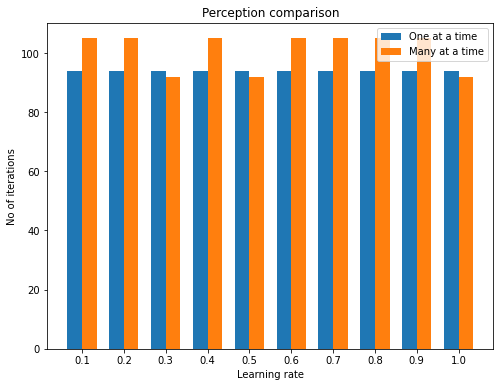

In [175]:
perception_comparison(lr,batch_iter,single_iter)

All Weights one

In [176]:
single_iter=[]
weights=np.ones(6)
for i in lr:
  iter= single_update(i,weights)
  single_iter.append(iter)
batch_iter=[]
for i in lr:
  iter= batch_update(i,weights)
  batch_iter.append(iter)
table_show(lr,batch_iter,single_iter)

 Learning rate  Many at a time  One at a time
           0.1             102              6
           0.2             104             92
           0.3              91            104
           0.4             116            106
           0.5             105             93
           0.6             114             93
           0.7              91            108
           0.8              91            115
           0.9             105             94
           1.0              93             94


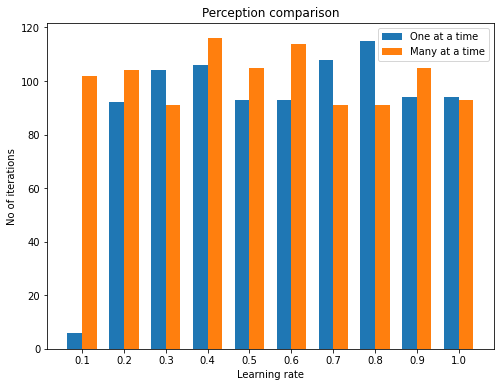

In [177]:
perception_comparison(lr,batch_iter,single_iter)

All Weights random

In [178]:
single_iter=[]
weights=[]
np.random.seed(6)
for i in range(6):
  weights.append(random.randint(0, 6))
for i in lr:
  iter= single_update(i,weights)
  single_iter.append(iter)
batch_iter=[]
for i in lr:
  iter= batch_update(i,weights)
  batch_iter.append(iter)
table_show(lr,batch_iter,single_iter)


 Learning rate  Many at a time  One at a time
           0.1              36             34
           0.2             106             21
           0.3             129             11
           0.4              87            106
           0.5             112             95
           0.6             111            100
           0.7              95            109
           0.8              99             98
           0.9              96            111
           1.0             109             87


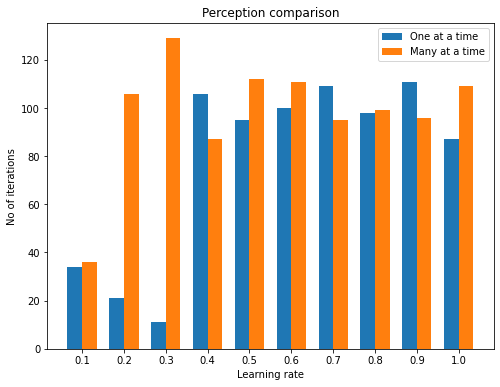

In [179]:
perception_comparison(lr,batch_iter,single_iter)

**4a.  In task 2, we need to take the sample points into a
higher dimension because if it is non linear data, we cannot
get the correct hyperplane. If the datasets are linear, then the
decision boundary can perfectly work. But in non linear data
the data’s are not linearly separable.Fot it, we need to take
it to a higher dimension where it can classify correctly.To
take the data points into higher dimension, we have used phi
function.**

**4b.  In each of the three initial weight cases and for each
learning rate the number of updates the algorithm take before
converging is given in the above portion using three tables and 
have also shown the bar chart to visualize the results.**